# MATH 210 Introduction to Mathematical Computing

**February 26, 2025**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Euler's Method

Let $y' = f(t,y)$, $y(t_0) = y_0$ be a first order differential equation. Euler's method is

$$
y_{n+1} = y_n + f(t_n,y_n)(t_{n+1} - t_n) \ , \ \ y_0 = y(t_0)
$$

Write a function called `odeEuler` which takes `f`, `t`, and `y0` where

* `f` is a Python function which represents the right hand side $y' = f(t,y)$
* `t` is a vector of $t$ values such that `t[0]` is $t_0$
* `y0` is a number representing the intial value $y(t_0)$ at time $t_0$

and returns a vector `y` of values given by Euler's method. In particular, `y[n]` is an approximation of the solution $y(t_n)$.

In [2]:
def odeEuler(f,t,y0):
    N = len(t) - 1
    y = np.zeros(N + 1)
    y[0] = y0
    for n in range(N):
        y[n+1] = y[n] + f(t[n],y[n])*(t[n+1] - t[n])
    return y

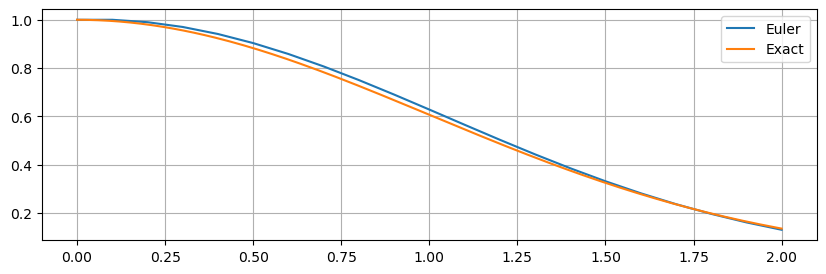

In [8]:
f = lambda t,y: -t*y # y(t) = e^{-t^2/2} , y'(t) = -t e^{-t^2/2} = -ty
t = np.linspace(0,2,21)
y0 = 1
y = odeEuler(f,t,y0)

plt.figure(figsize=(10,3))
ts = np.linspace(0,2,200)
plt.plot(t,y,ts,np.exp(-ts**2/2))
plt.legend(['Euler','Exact']), plt.grid(True)
plt.show()

How do we apply Euler's method to a second order differential equation?

$$
ay'' + by' + cy = h(t)
$$

$$
y(t_1) \approx y(t_0) + y'(t_0)(t_1 - t_0)
$$

$$
y'(t_1) \approx y'(t_0) + y''(t_0)(t_1 - t_0)
$$

Write $y'' = f(t,y,y')$ and setup

$$
y(t_1) \approx y(t_0) + y'(t_0)(t_1 - t_0)
$$

$$
y'(t_1) \approx y'(t_0) + y''(t_0)(t_1 - t_0) = y'(t_0) + f(t_0,y(t_0),y'(t_0))(t_1 - t_0)
$$

In [9]:
def odeEuler2(f,t,y0,dy0):
    N = len(t) - 1
    y = np.zeros(N + 1)
    dy = np.zeros(N + 1)
    y[0] = y0
    dy[0] = dy0
    for n in range(N):
        y[n+1] = y[n] + dy[n]*(t[n + 1] - t[n])
        dy[n+1] = dy[n] + f(t[n],y[n],dy[n])*(t[n + 1] - t[n])
    return y

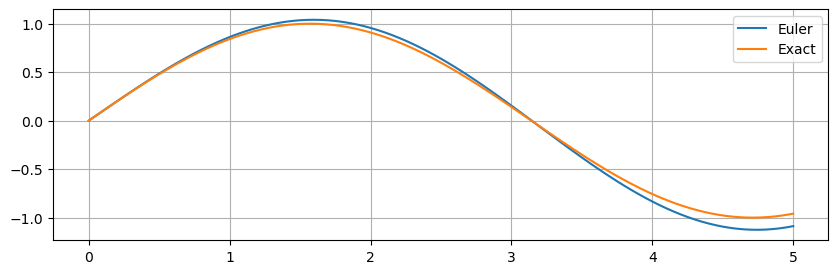

In [13]:
# y'' + y = 0, y(0) = 0, dy(0) = 1
f = lambda t,y,dy: -y 
t = np.linspace(0,5,101)
y0 = 0
dy0 = 1

plt.figure(figsize=(10,3))
ts = np.linspace(0,5,200)
y = odeEuler2(f,t,y0,dy0)
plt.plot(t,y,ts,np.sin(ts))
plt.legend(['Euler','Exact']), plt.grid(True)
plt.show()